# Import Dependancies

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
# plt.style.use('ggplot')

# Reading CSV File

In [2]:
df=pd.read_csv('MultiVarLR.csv',header=None)
df.head()

,0,1,2,3
0,73.0,80.0,75.0,152.0
1,93.0,88.0,93.0,185.0
2,89.0,91.0,90.0,180.0
3,96.0,98.0,100.0,196.0
4,73.0,66.0,70.0,142.0


In [3]:
m=df.shape[0]
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values.reshape(-1,1)

In [4]:
X=np.hstack([np.ones((m,1)),X])
w=np.zeros(X.shape[1]).reshape(X.shape[1],1)

# Building Functions

In [5]:
def plot(x,y,xname,yname,mark):
    plt.figure(figsize=(10,7))
    plt.grid()
    plt.plot(x,y,marker=mark,color='m')
    plt.ylabel(yname, fontsize=15)
    plt.xlabel(xname, fontsize=15)
    plt.show()
    
    
def plot_all_reg(x,y,y_hat_hist,xname,yname,mark):
    plt.figure(figsize=(10,7))
    plt.grid()
    plt.scatter(x,y)
    for i in range(len(y_hat_hist)):
        plt.plot(x,y_hat_hist[i],color='r')

    plt.ylabel(yname, fontsize=15)
    plt.xlabel(xname, fontsize=15)
    plt.show()
    
def best_fit_line(x,y,y_hat,xname,yname,mark):
    plt.figure(figsize=(10,7))
    plt.grid()
    plt.scatter(x,y)
    plt.plot(x,y_hat,marker=mark,color='r')
    plt.ylabel(yname, fontsize=15)
    plt.xlabel(xname, fontsize=15)
    plt.show()



In [6]:
def Hypothesis(X,w):
    H=  X @ w 
    return H

In [7]:
def compute_cost(X,y,w,Hypothesis):
    j= ( 1 / (2*m) ) * np.sum ((Hypothesis(X,w) - y )**2)
    return j, (Hypothesis(X,w) - y) 

# Gradient Decent

In [8]:
def Gradient_decent(X,y,w,alpha,iteration,thershold,Hypothesis,compute_cost):
    
    w=np.zeros(X.shape[1]).reshape(X.shape[1],1)
    cost_history=[]
    p_history=[]
    gradient__history=[]
    
    
    for i in range(iteration):
        
        H=Hypothesis(X,w)
        j,err_vec=compute_cost(X,y,w,Hypothesis)
        cost_history.append((j,err_vec))
        p_history.append(w)
        dj_dw= (1/m)* (X.T@err_vec)
        norm= np.linalg.norm(dj_dw)
        gradient__history.append((norm,dj_dw))
        w= w - alpha * dj_dw
        print(f"Iteration {i}: \n Cost \n{cost_history[-1]}\n dj_dw: \n{dj_dw}\n ,norm={norm}\n w: {w}")
        if i>0 and ( (norm < thershold)  or  (abs(cost_history[i][0]-cost_history[i-1][0]) <thershold) ):
            break
    return w , cost_history, p_history,gradient__history,i

In [9]:
alpha=0.0001
thershold=0.001
iteration=1000
w , cost_history, p_history,gradient__history,i=Gradient_decent(X,y,w,alpha,iteration,thershold,Hypothesis,compute_cost)

Iteration 0: 
 Cost 
(13405.98, array([[-152.],
       [-185.],
       [-180.],
       [-196.],
       [-142.],
       [-101.],
       [-149.],
       [-115.],
       [-175.],
       [-164.],
       [-141.],
       [-141.],
       [-184.],
       [-152.],
       [-148.],
       [-192.],
       [-147.],
       [-183.],
       [-177.],
       [-159.],
       [-177.],
       [-175.],
       [-175.],
       [-149.],
       [-192.]]))
 dj_dw: 
[[  -162.04]
 [-13075.8 ]
 [-13147.2 ]
 [-13467.08]]
 ,norm=22917.545989219703
 w: [[0.016204]
 [1.30758 ]
 [1.31472 ]
 [1.346708]]
Iteration 1: 
 Cost 
(12348.667642841165, array([[149.650244],
       [177.560348],
       [177.234064],
       [193.057244],
       [134.510624],
       [102.864004],
       [142.22502 ],
       [100.899264],
       [163.842264],
       [149.855728],
       [139.579308],
       [135.659996],
       [185.069972],
       [154.802308],
       [144.564588],
       [175.915192],
       [145.187588],
       [166.498828],
     

Iteration 22: 
 Cost 
(2202.654130376594, array([[-60.46867895],
       [-74.90075617],
       [-71.56680901],
       [-77.85270068],
       [-58.05542883],
       [-39.01557682],
       [-60.50476271],
       [-49.31670413],
       [-72.01663742],
       [-68.48228479],
       [-55.77030079],
       [-56.90210509],
       [-72.02869795],
       [-58.99242132],
       [-59.07886599],
       [-80.23045311],
       [-58.46270662],
       [-76.78225802],
       [-70.27358353],
       [-63.50467118],
       [-73.23247414],
       [-71.66368363],
       [-76.08899702],
       [-56.84315219],
       [-77.93462329]]))
 dj_dw: 
[[  -65.59877334]
 [-5292.26089318]
 [-5320.97017529]
 [-5457.67518059]]
 ,norm=9279.615861861006
 w: [[0.01143878]
 [0.91758878]
 [0.92152227]
 [0.97272679]]
Iteration 23: 
 Cost 
(2029.294753841417, array([[61.6717107 ],
       [71.90474673],
       [73.08077804],
       [79.68182329],
       [53.90676499],
       [43.53364209],
       [57.41767552],
       [38.106966

 [0.64763426]]
Iteration 52: 
 Cost 
(192.00051874229666, array([[-16.39435131],
       [-21.81774927],
       [-19.32567036],
       [-20.8865175 ],
       [-17.60284058],
       [ -9.06824096],
       [-17.78787694],
       [-17.54640078],
       [-22.29384328],
       [-22.25877483],
       [-14.65564769],
       [-16.28631966],
       [-18.1278588 ],
       [-14.28020444],
       [-16.14131521],
       [-26.30553807],
       [-15.93315376],
       [-25.49796319],
       [-18.91513487],
       [-17.54997802],
       [-23.14986378],
       [-21.80178816],
       [-28.36890395],
       [-12.57225537],
       [-22.97123093]]))
 dj_dw: 
[[  -19.10157687]
 [-1539.86075118]
 [-1548.09911553]
 [-1595.98479361]]
 ,norm=2704.6837774907817
 w: [[0.00909474]
 [0.72222197]
 [0.72411834]
 [0.80723274]]
Iteration 53: 
 Cost 
(177.26543196056656, array([[19.20322121],
       [20.97079667],
       [22.83256558],
       [25.02927514],
       [15.02940078],
       [14.99410348],
       [16.58408876],

 [0.77633243]]
Iteration 77: 
 Cost 
(29.064057064695454, array([[ 8.20716211],
       [ 7.83513739],
       [ 9.8438238 ],
       [10.93770264],
       [ 4.98664165],
       [ 7.68292799],
       [ 6.09395894],
       [ 0.23995293],
       [ 5.50733802],
       [ 3.62412098],
       [ 8.32038397],
       [ 6.42728492],
       [11.95190167],
       [10.64974755],
       [ 7.86910511],
       [ 3.83119599],
       [ 7.7669038 ],
       [ 3.17875939],
       [ 9.73968033],
       [ 8.09038616],
       [ 4.84739191],
       [ 6.06631446],
       [-1.69895438],
       [12.10064145],
       [ 7.72073394]]))
 dj_dw: 
[[  6.87280971]
 [556.21188826]
 [559.37247763]
 [561.28499436]]
 ,norm=968.1721509007217
 w: [[0.00775907]
 [0.61025386]
 [0.61112406]
 [0.72020393]]
Iteration 78: 
 Cost 
(27.169196994741952, array([[ -4.53848923],
       [ -7.48074871],
       [ -5.24900378],
       [ -5.49731899],
       [ -6.69524573],
       [ -0.92586316],
       [ -6.20584116],
       [ -8.87512607],
   

Iteration 100: 
 Cost 
(8.585152683452465, array([[ -0.87982819],
       [ -3.01470623],
       [ -0.88779409],
       [ -0.70037885],
       [ -3.31110642],
       [  1.65002619],
       [ -2.56417627],
       [ -6.10615789],
       [ -4.55551675],
       [ -5.58077891],
       [ -0.05066508],
       [ -1.77607117],
       [  0.81521659],
       [  1.32590811],
       [ -0.81261916],
       [ -7.13832122],
       [ -1.15061941],
       [ -7.19722283],
       [ -0.8964954 ],
       [ -1.4252604 ],
       [ -5.31291372],
       [ -4.06859226],
       [-11.4062092 ],
       [  2.82361817],
       [ -3.55848986]]))
 dj_dw: 
[[  -2.63116617]
 [-211.17149325]
 [-212.34912185]
 [-227.87412292]]
 ,norm=376.32311654119985
 w: [[0.00815999]
 [0.63953367]
 [0.64047571]
 [0.77516881]]
Iteration 101: 
 Cost 
(8.29288273622746, array([[ 4.06983572],
       [ 2.93735339],
       [ 4.97513943],
       [ 5.68689322],
       [ 1.22733166],
       [ 4.99961186],
       [ 2.2191844 ],
       [-2.55698894

 [0.7887114 ]]
Iteration 133: 
 Cost 
(4.986723718879268, array([[ 2.22141654],
       [ 0.80731742],
       [ 2.82386653],
       [ 3.40892712],
       [-0.42801746],
       [ 3.89003556],
       [ 0.58488742],
       [-3.67221653],
       [-0.87974465],
       [-2.0195262 ],
       [ 2.94264839],
       [ 1.24283345],
       [ 4.58283313],
       [ 4.3682864 ],
       [ 2.3724659 ],
       [-3.20470002],
       [ 1.69477217],
       [-3.39757117],
       [ 2.67015385],
       [ 1.76796162],
       [-1.63038335],
       [-0.42362641],
       [-7.92234719],
       [ 5.79426234],
       [ 0.35612834]]))
 dj_dw: 
[[ 0.71802653]
 [58.72633771]
 [58.88402796]
 [50.44231189]]
 ,norm=97.2679488890533
 w: [[0.00789393]
 [0.61484281]
 [0.61595995]
 [0.78366717]]
Iteration 134: 
 Cost 
(4.961392216797301, array([[ 0.94325291],
       [-0.72620227],
       [ 1.31130486],
       [ 1.76359588],
       [-1.5985223 ],
       [ 3.03041492],
       [-0.64454372],
       [-4.58070655],
       [-2.30990

 [0.80190911]]
Iteration 160: 
 Cost 
(4.6085506371199, array([[ 1.29776051],
       [-0.23240219],
       [ 1.75889884],
       [ 2.30069184],
       [-1.2460725 ],
       [ 3.374714  ],
       [-0.18772056],
       [-4.16744212],
       [-1.77207846],
       [-2.72571937],
       [ 2.16627515],
       [ 0.52816134],
       [ 3.43092331],
       [ 3.34156357],
       [ 1.61253347],
       [-4.2170829 ],
       [ 0.67612133],
       [-4.30846084],
       [ 1.55291747],
       [ 0.77003902],
       [-2.54461913],
       [-1.35314857],
       [-8.8146881 ],
       [ 4.74271059],
       [-0.75681352]]))
 dj_dw: 
[[ -0.19091751]
 [-14.96064685]
 [-15.31865479]
 [-24.91186382]]
 ,norm=32.849955050733854
 w: [[0.0078471 ]
 [0.60943295]
 [0.61112383]
 [0.8044003 ]]
Iteration 161: 
 Cost 
(4.60073689074528, array([[ 1.71638054],
       [ 0.27323541],
       [ 2.25567422],
       [ 2.8435746 ],
       [-0.86135452],
       [ 3.66150558],
       [ 0.22070639],
       [-3.86185234],
       [-1.29

 [0.8132799 ]]
Iteration 178: 
 Cost 
(4.488227435860972, array([[ 1.37365433],
       [-0.09748988],
       [ 1.86662555],
       [ 2.45087338],
       [-1.1594541 ],
       [ 3.49435071],
       [-0.03871507],
       [-4.00711003],
       [-1.59572336],
       [-2.48584677],
       [ 2.28910565],
       [ 0.68114583],
       [ 3.5093048 ],
       [ 3.36260401],
       [ 1.77238482],
       [-4.05288526],
       [ 0.66979498],
       [-4.11897897],
       [ 1.61568597],
       [ 0.82743346],
       [-2.37529345],
       [-1.1972934 ],
       [-8.66632736],
       [ 4.74258425],
       [-0.63935073]]))
 dj_dw: 
[[ -0.07115682]
 [ -5.50288848]
 [ -5.87648451]
 [-14.88236241]]
 ,norm=16.920538581316567
 w: [[0.00777661]
 [0.6031352 ]
 [0.60535257]
 [0.81476813]]
Iteration 179: 
 Cost 
(4.482400599605666, array([[ 1.57246213],
       [ 0.14381314],
       [ 2.10302565],
       [ 2.7101214 ],
       [-0.97631456],
       [ 3.63240796],
       [ 0.15734216],
       [-3.85903685],
       [-1

 [0.8283617 ]]
Iteration 203: 
 Cost 
(4.355281774966938, array([[ 1.46519869],
       [ 0.06915533],
       [ 1.9980745 ],
       [ 2.63772643],
       [-1.05437256],
       [ 3.64581639],
       [ 0.15022173],
       [-3.80010477],
       [-1.37348031],
       [-2.17836956],
       [ 2.44312843],
       [ 0.87473965],
       [ 3.60131331],
       [ 3.38032121],
       [ 1.97547945],
       [-3.84734795],
       [ 0.65114694],
       [-3.87771325],
       [ 1.68773168],
       [ 0.89369523],
       [-2.1611372 ],
       [-1.00191479],
       [-8.47941118],
       [ 4.73290974],
       [-0.49614019]]))
 dj_dw: 
[[ 0.07746668]
 [ 6.21420512]
 [ 5.81840663]
 [-2.42878819]]
 ,norm=8.852977695163645
 w: [[0.00767485]
 [0.59468623]
 [0.59782979]
 [0.82860458]]
Iteration 204: 
 Cost 
(4.350370136868971, array([[ 1.39149591],
       [-0.01725877],
       [ 1.91167192],
       [ 2.54532982],
       [-1.12114397],
       [ 3.59946703],
       [ 0.08298142],
       [-3.84732963],
       [-1.4516

Iteration 218: 
 Cost 
(4.283948817633105, array([[ 1.38171001e+00],
       [ 6.20438974e-04],
       [ 1.91209482e+00],
       [ 2.56926440e+00],
       [-1.11952743e+00],
       [ 3.64031737e+00],
       [ 1.27475434e-01],
       [-3.77805771e+00],
       [-1.39940333e+00],
       [-2.14389920e+00],
       [ 2.40483392e+00],
       [ 8.60662646e-01],
       [ 3.48723523e+00],
       [ 3.25157164e+00],
       [ 1.96016440e+00],
       [-3.89582855e+00],
       [ 5.07811040e-01],
       [-3.89645398e+00],
       [ 1.57006990e+00],
       [ 7.89539383e-01],
       [-2.19219146e+00],
       [-1.04366218e+00],
       [-8.51889808e+00],
       [ 4.58995006e+00],
       [-5.84037488e-01]]))
 dj_dw: 
[[ 0.01925445]
 [ 1.35454693]
 [ 0.88383562]
 [-7.19970504]]
 ,norm=7.379165685721568
 w: [[0.00761848]
 [0.59032326]
 [0.59412668]
 [0.83716529]]
Iteration 219: 
 Cost 
(4.279359515410389, array([[ 1.41874699],
       [ 0.04720073],
       [ 1.95679187],
       [ 2.61959429],
       [-1.0848529

Iteration 232: 
 Cost 
(4.221407110549512, array([[ 1.36614157],
       [ 0.01020538],
       [ 1.90509172],
       [ 2.58445719],
       [-1.124031  ],
       [ 3.67548841],
       [ 0.16482954],
       [-3.71487275],
       [-1.35601184],
       [-2.05074973],
       [ 2.4258163 ],
       [ 0.90258003],
       [ 3.45710478],
       [ 3.19574511],
       [ 2.00444039],
       [-3.86695825],
       [ 0.43569746],
       [-3.84374428],
       [ 1.53335628],
       [ 0.75776547],
       [-2.15243489],
       [-1.01419913],
       [-8.48990229],
       [ 4.52095409],
       [-0.58930936]]))
 dj_dw: 
[[ 0.02949841]
 [ 2.03460557]
 [ 1.52515094]
 [-6.29159055]]
 ,norm=6.786065654378251
 w: [[0.00756105]
 [0.58607764]
 [0.59055926]
 [0.84467069]]
Iteration 233: 
 Cost 
(4.217075712573375, array([[ 1.38627172],
       [ 0.03637106],
       [ 1.92972622],
       [ 2.61289146],
       [-1.10491144],
       [ 3.69229011],
       [ 0.18794694],
       [-3.69522964],
       [-1.32914024],
       [

 [0.86209861]]
Iteration 267: 
 Cost 
(4.079623927805847, array([[ 1.32330829],
       [ 0.02390105],
       [ 1.88056085],
       [ 2.61205069],
       [-1.14224314],
       [ 3.75340992],
       [ 0.24792364],
       [-3.56789062],
       [-1.26176761],
       [-1.8376161 ],
       [ 2.46951251],
       [ 0.9952295 ],
       [ 3.377233  ],
       [ 3.05594637],
       [ 2.10365731],
       [-3.80729893],
       [ 0.25679324],
       [-3.72476122],
       [ 1.43853134],
       [ 0.67571412],
       [-2.06493452],
       [-0.95249294],
       [-8.42749697],
       [ 4.35084399],
       [-0.61096322]]))
 dj_dw: 
[[ 0.04668602]
 [ 3.0703645 ]
 [ 2.47024264]
 [-4.72837374]]
 ,norm=6.155398821990792
 w: [[0.00741117]
 [0.57583218]
 [0.58225714]
 [0.86257145]]
Iteration 268: 
 Cost 
(4.075853901469635, array([[ 1.31659083],
       [ 0.01757774],
       [ 1.87330609],
       [ 2.60564589],
       [-1.14786645],
       [ 3.75177526],
       [ 0.24486214],
       [-3.56778912],
       [-1.2654

 [0.87277778]]
Iteration 289: 
 Cost 
(4.0000010149329555, array([[ 1.28888166],
       [ 0.01967067],
       [ 1.85461683],
       [ 2.61602655],
       [-1.16285985],
       [ 3.79223936],
       [ 0.28838287],
       [-3.48658185],
       [-1.21774417],
       [-1.72229714],
       [ 2.48645673],
       [ 1.04067366],
       [ 3.31804143],
       [ 2.96307379],
       [ 2.15341484],
       [-3.78429223],
       [ 0.14070817],
       [-3.66441718],
       [ 1.37125153],
       [ 0.61733823],
       [-2.0236076 ],
       [-0.92736862],
       [-8.40043955],
       [ 4.24075567],
       [-0.63638113]]))
 dj_dw: 
[[ 0.04662171]
 [ 2.85500644]
 [ 2.19986684]
 [-4.65362536]]
 ,norm=5.8863297968139285
 w: [[0.00731282]
 [0.56967245]
 [0.57748377]
 [0.87324314]]
Iteration 290: 
 Cost 
(3.996541989076705, array([[ 1.28533871],
       [ 0.01703434],
       [ 1.85106645],
       [ 2.61359138],
       [-1.1656498 ],
       [ 3.79257872],
       [ 0.28823257],
       [-3.48440254],
       [-1.21

 [0.88436112]]
Iteration 314: 
 Cost 
(3.9174429372855872, array([[ 1.25248572],
       [ 0.01481098],
       [ 1.82693695],
       [ 2.62082005],
       [-1.18576358],
       [ 3.83375709],
       [ 0.33298923],
       [-3.39730611],
       [-1.1706005 ],
       [-1.59795085],
       [ 2.50513226],
       [ 1.08962779],
       [ 3.25431057],
       [ 2.86266349],
       [ 2.20789724],
       [-3.75950253],
       [ 0.01469227],
       [-3.59778282],
       [ 1.29894557],
       [ 0.55476734],
       [-1.97812867],
       [-0.90030226],
       [-8.37034367],
       [ 4.12230059],
       [-0.66400117]]))
 dj_dw: 
[[ 0.0468182 ]
 [ 2.64161435]
 [ 1.92997506]
 [-4.5509513 ]]
 ,norm=5.605022729200679
 w: [[0.0071969 ]
 [0.56288584]
 [0.57241012]
 [0.88481622]]
Iteration 315: 
 Cost 
(3.914304674071943, array([[ 1.25188959],
       [ 0.01557935],
       [ 1.82681769],
       [ 2.62205163],
       [-1.18593322],
       [ 3.8359042 ],
       [ 0.33551792],
       [-3.39322853],
       [-1.167

 [0.89235809]]
Iteration 332: 
 Cost 
(3.862774794052133, array([[ 1.22901953],
       [ 0.01253582],
       [ 1.80936633],
       [ 2.62577835],
       [-1.2009589 ],
       [ 3.86272365],
       [ 0.36523391],
       [-3.33426918],
       [-1.13729114],
       [-1.51154205],
       [ 2.51917642],
       [ 1.1241441 ],
       [ 3.21191364],
       [ 2.79464948],
       [ 2.24682674],
       [-3.74123363],
       [-0.0713134 ],
       [-3.54984386],
       [ 1.25069924],
       [ 0.51315967],
       [-1.94515225],
       [-0.88057139],
       [-8.34797563],
       [ 4.0422291 ],
       [-0.68179352]]))
 dj_dw: 
[[ 0.04822044]
 [ 2.59578614]
 [ 1.8476829 ]
 [-4.37524307]]
 ,norm=5.41268093522145
 w: [[0.00711075]
 [0.55813144]
 [0.56897152]
 [0.89279561]]
Iteration 333: 
 Cost 
(3.8598479854914434, array([[ 1.22809833],
       [ 0.01282034],
       [ 1.80882228],
       [ 2.62649912],
       [-1.20148097],
       [ 3.86452566],
       [ 0.36733468],
       [-3.33056977],
       [-1.1350

 [0.9017526 ]]
Iteration 354: 
 Cost 
(3.8009255742947925, array([[ 1.20180982],
       [ 0.00930581],
       [ 1.78868605],
       [ 2.63155016],
       [-1.21947282],
       [ 3.8961293 ],
       [ 0.40333329],
       [-3.25966078],
       [-1.09892458],
       [-1.41085331],
       [ 2.535603  ],
       [ 1.1641812 ],
       [ 3.16206043],
       [ 2.71465744],
       [ 2.29263139],
       [-3.72025642],
       [-0.1727309 ],
       [-3.49303988],
       [ 1.19413016],
       [ 0.46448229],
       [-1.90629211],
       [-0.85786273],
       [-8.32149691],
       [ 3.94851575],
       [-0.70311271]]))
 dj_dw: 
[[ 0.04973492]
 [ 2.53029428]
 [ 1.74144308]
 [-4.18021062]]
 ,norm=5.187643734947472
 w: [[0.00700262]
 [0.55247244]
 [0.56500583]
 [0.90217062]]
Iteration 355: 
 Cost 
(3.798237009466179, array([[ 1.20075373],
       [ 0.00932036],
       [ 1.78793622],
       [ 2.63199032],
       [-1.22018099],
       [ 3.89769429],
       [ 0.40517023],
       [-3.25622895],
       [-1.097

 [0.91154593]]
Iteration 378: 
 Cost 
(3.739168498021206, array([[ 1.17396557e+00],
       [ 5.36712610e-03],
       [ 1.76718361e+00],
       [ 2.63761383e+00],
       [-1.23949654e+00],
       [ 3.93025470e+00],
       [ 4.43397953e-01],
       [-3.18115365e+00],
       [-1.05975986e+00],
       [-1.30679940e+00],
       [ 2.55271925e+00],
       [ 1.20537568e+00],
       [ 3.11014151e+00],
       [ 2.63124918e+00],
       [ 2.34054938e+00],
       [-3.69887135e+00],
       [-2.78828435e-01],
       [-3.43313631e+00],
       [ 1.13539441e+00],
       [ 4.14074891e-01],
       [-1.86553984e+00],
       [-8.34663783e-01],
       [-8.29355770e+00],
       [ 3.85134084e+00],
       [-7.25734545e-01]]))
 dj_dw: 
[[ 0.05124346]
 [ 2.45522985]
 [ 1.62647407]
 [-3.98315955]]
 ,norm=4.953963811057825
 w: [[0.00688123]
 [0.54648372]
 [0.5609611 ]
 [0.91194424]]
Iteration 379: 
 Cost 
(3.7367166720019966, array([[ 1.17289917e+00],
       [ 5.25877606e-03],
       [ 1.76637447e+00],
       [ 2.6

 [0.91859275]]
Iteration 396: 
 Cost 
(3.6964393402514877, array([[ 1.15430244e+00],
       [ 2.18358025e-03],
       [ 1.75177915e+00],
       [ 2.64204114e+00],
       [-1.25436265e+00],
       [ 3.95436192e+00],
       [ 4.72482365e-01],
       [-3.12415947e+00],
       [-1.03210306e+00],
       [-1.23250659e+00],
       [ 2.56505383e+00],
       [ 1.23467951e+00],
       [ 3.07284873e+00],
       [ 2.57124588e+00],
       [ 2.37516557e+00],
       [-3.68377378e+00],
       [-3.55394614e-01],
       [-3.38954557e+00],
       [ 1.09331769e+00],
       [ 3.78055216e-01],
       [-1.83602653e+00],
       [-8.18257499e-01],
       [-8.27320275e+00],
       [ 3.78178904e+00],
       [-7.42244534e-01]]))
 dj_dw: 
[[ 0.05230916]
 [ 2.39887471]
 [ 1.54313008]
 [-3.84329947]]
 ,norm=4.786390848507806
 w: [[0.00678793]
 [0.54211494]
 [0.55811007]
 [0.91897708]]
Iteration 397: 
 Cost 
(3.694150570229039, array([[ 1.15326513e+00],
       [ 2.03195486e-03],
       [ 1.75097115e+00],
       [ 2.6

Iteration 420: 
 Cost 
(3.6438449083201663, array([[ 1.12963856e+00],
       [-2.32230341e-03],
       [ 1.73217439e+00],
       [ 2.64780652e+00],
       [-1.27395927e+00],
       [ 3.98463809e+00],
       [ 5.10036486e-01],
       [-3.05058091e+00],
       [-9.97377467e-01],
       [-1.13818629e+00],
       [ 2.58087194e+00],
       [ 1.27174948e+00],
       [ 3.02523757e+00],
       [ 2.49450820e+00],
       [ 2.41964386e+00],
       [-3.66481382e+00],
       [-4.53628641e-01],
       [-3.33313136e+00],
       [ 1.03974099e+00],
       [ 3.32309120e-01],
       [-1.79800607e+00],
       [-7.97619924e-01],
       [-8.24682148e+00],
       [ 3.69329474e+00],
       [-7.63649154e-01]]))
 dj_dw: 
[[ 0.05366213]
 [ 2.32496536]
 [ 1.43691771]
 [-3.66559987]]
 ,norm=4.572712376866113
 w: [[0.00666066]
 [0.53644867]
 [0.55453877]
 [0.92797523]]
Iteration 421: 
 Cost 
(3.6417559206895995, array([[ 1.12865761e+00],
       [-2.50464448e-03],
       [ 1.73139128e+00],
       [ 2.64805570e+00],


 [0.93480416]]
Iteration 440: 
 Cost 
(3.603533028169909, array([[ 1.11037755e+00],
       [-6.27903176e-03],
       [ 1.71662205e+00],
       [ 2.65249951e+00],
       [-1.29008279e+00],
       [ 4.00832384e+00],
       [ 5.40302620e-01],
       [-2.99129802e+00],
       [-9.70216408e-01],
       [-1.06352564e+00],
       [ 2.59353182e+00],
       [ 1.30098131e+00],
       [ 2.98733240e+00],
       [ 2.43329727e+00],
       [ 2.45530626e+00],
       [-3.64997800e+00],
       [-5.32254240e-01],
       [-3.28755806e+00],
       [ 9.97205924e-01],
       [ 2.96091530e-01],
       [-1.76743669e+00],
       [-7.81442970e-01],
       [-8.22547516e+00],
       [ 3.62309053e+00],
       [-7.80963993e-01]]))
 dj_dw: 
[[ 0.05473806]
 [ 2.26485731]
 [ 1.35291736]
 [-3.52441217]]
 ,norm=4.402776555586291
 w: [[0.00655219]
 [0.53186152]
 [0.55175325]
 [0.93515661]]
Iteration 441: 
 Cost 
(3.6015964133222487, array([[ 1.10944837e+00],
       [-6.47631815e-03],
       [ 1.71586751e+00],
       [ 2.6

 [0.94172319]]
Iteration 460: 
 Cost 
(3.5661555031624985, array([[ 1.09223129],
       [-0.01039923],
       [ 1.70175243],
       [ 2.65709555],
       [-1.30601137],
       [ 4.03068007],
       [ 0.5696674 ],
       [-2.93379739],
       [-0.94458418],
       [-0.99227391],
       [ 2.60573845],
       [ 1.32878036],
       [ 2.95096777],
       [ 2.37446884],
       [ 2.48974552],
       [-3.63597062],
       [-0.60805634],
       [-3.24324896],
       [ 0.95650475],
       [ 0.26152475],
       [-1.73784074],
       [-0.76614419],
       [-8.20468977],
       [ 3.55595767],
       [-0.79781564]]))
 dj_dw: 
[[ 0.0557713 ]
 [ 2.20623541]
 [ 1.27298645]
 [-3.38903627]]
 ,norm=4.239887551449388
 w: [[0.00644162]
 [0.52739336]
 [0.54913175]
 [0.94206209]]
Iteration 461: 
 Cost 
(3.564359527161571, array([[ 1.09135408],
       [-0.01060704],
       [ 1.7010285 ],
       [ 2.65732521],
       [-1.30680093],
       [ 4.03176541],
       [ 0.57111428],
       [-2.93096678],
       [-0.943

Iteration 487: 
 Cost 
(3.519953633109405, array([[ 1.06940637],
       [-0.01619134],
       [ 1.68271098],
       [ 2.66315172],
       [-1.327197  ],
       [ 4.0588683 ],
       [ 0.60793304],
       [-2.85889517],
       [-0.91227114],
       [-0.90122076],
       [ 2.62153074],
       [ 1.36415506],
       [ 2.90420799],
       [ 2.29866084],
       [ 2.5343798 ],
       [-3.61830084],
       [-0.70609944],
       [-3.18536893],
       [ 0.90432933],
       [ 0.21735014],
       [-1.69936887],
       [-0.74680667],
       [-8.17749013],
       [ 3.46996554],
       [-0.81985116]]))
 dj_dw: 
[[ 0.05710354]
 [ 2.12954936]
 [ 1.1713664 ]
 [-3.21490012]]
 ,norm=4.030623190863156
 w: [[0.00628916]
 [0.52154445]
 [0.54583847]
 [0.95096646]]
Iteration 488: 
 Cost 
(3.5183305572108097, array([[ 1.06859577],
       [-0.01641132],
       [ 1.68202695],
       [ 2.66337195],
       [-1.32797514],
       [ 4.05986964],
       [ 0.60932006],
       [-2.85618002],
       [-0.91112362],
       

 [0.95602604]]
Iteration 504: 
 Cost 
(3.4931685533394843, array([[ 1.05596754],
       [-0.01996069],
       [ 1.67130091],
       [ 2.66687746],
       [-1.34034627],
       [ 4.07550269],
       [ 0.6312413 ],
       [-2.8132854 ],
       [-0.89320629],
       [-0.84677566],
       [ 2.63108468],
       [ 1.38522005],
       [ 2.87607904],
       [ 2.2529649 ],
       [ 2.56142913],
       [-3.60786945],
       [-0.76540578],
       [-3.15003334],
       [ 0.87303496],
       [ 0.1909335 ],
       [-1.67598901],
       [-0.73536789],
       [-8.16085818],
       [ 3.41842745],
       [-0.83331831]]))
 dj_dw: 
[[ 0.0579059 ]
 [ 2.08257914]
 [ 1.11081419]
 [-3.11020809]]
 ,norm=3.904842060241254
 w: [[0.00619136]
 [0.51796665]
 [0.54390203]
 [0.95633706]]
Iteration 505: 
 Cost 
(3.4916451916893774, array([[ 1.05519897],
       [-0.02018469],
       [ 1.67064363],
       [ 2.66709502],
       [-1.34111481],
       [ 4.07645563],
       [ 0.63259429],
       [-2.81063862],
       [-0.89

 [0.96332606]]
Iteration 528: 
 Cost 
(3.45812538004096, array([[ 1.03815461],
       [-0.0254216 ],
       [ 1.6559193 ],
       [ 2.67202754],
       [-1.35865401],
       [ 4.09760465],
       [ 0.66315401],
       [-2.75085924],
       [-0.86787884],
       [-0.77351245],
       [ 2.64408454],
       [ 1.41345527],
       [ 2.83801545],
       [ 2.19100978],
       [ 2.59828998],
       [-3.59400212],
       [-0.84607827],
       [-3.10155354],
       [ 0.83080517],
       [ 0.15538673],
       [-1.64404574],
       [-0.72013218],
       [-8.13800481],
       [ 3.34892795],
       [-0.85180929]]))
 dj_dw: 
[[ 0.05899532]
 [ 2.01814291]
 [ 1.02980247]
 [-2.96840817]]
 ,norm=3.734745164467744
 w: [[0.00605101]
 [0.5130494 ]
 [0.54133833]
 [0.9636229 ]]
Iteration 529: 
 Cost 
(3.456731837073034, array([[ 1.03744091],
       [-0.02565229],
       [ 1.6552964 ],
       [ 2.67223949],
       [-1.35941019],
       [ 4.09849175],
       [ 0.66445913],
       [-2.74830686],
       [-0.86686

 [0.97142372]]
Iteration 556: 
 Cost 
(3.420986875508067, array([[ 1.0189889 ],
       [-0.03197435],
       [ 1.6389942 ],
       [ 2.67787505],
       [-1.37963044],
       [ 4.12146049],
       [ 0.69896844],
       [-2.6808289 ],
       [-0.84054737],
       [-0.69309473],
       [ 2.65855906],
       [ 1.4442887 ],
       [ 2.79592857],
       [ 2.12233569],
       [ 2.63941258],
       [-3.57902457],
       [-0.93587507],
       [-3.04700558],
       [ 0.7842789 ],
       [ 0.11636741],
       [-1.6082922 ],
       [-0.70363425],
       [-8.11224283],
       [ 3.272427  ],
       [-0.87263668]]))
 dj_dw: 
[[ 0.06020392]
 [ 1.94555363]
 [ 0.94145606]
 [-2.81153324]]
 ,norm=3.5468101314886584
 w: [[0.00588406]
 [0.50750448]
 [0.53858448]
 [0.97170487]]
Iteration 557: 
 Cost 
(3.419730043982689, array([[ 1.01833519],
       [-0.03221158],
       [ 1.6384093 ],
       [ 2.67808077],
       [-1.38037188],
       [ 4.12227577],
       [ 0.70022013],
       [-2.67838198],
       [-0.839

 [0.9785598 ]]
Iteration 582: 
 Cost 
(3.389761559648519, array([[ 1.00264909],
       [-0.03820768],
       [ 1.62420614],
       [ 2.6831531 ],
       [-1.39873517],
       [ 4.14187076],
       [ 0.73091423],
       [-2.61838906],
       [-0.81716877],
       [-0.62301472],
       [ 2.67136496],
       [ 1.47100949],
       [ 2.75896536],
       [ 2.06186351],
       [ 2.67586884],
       [-3.56620077],
       [-1.01529541],
       [-2.99822067],
       [ 0.74357213],
       [ 0.08236292],
       [-1.5764878 ],
       [-0.68946834],
       [-8.08915869],
       [ 3.20555947],
       [-0.89128348]]))
 dj_dw: 
[[ 0.06126918]
 [ 1.88055702]
 [ 0.86500997]
 [-2.67367169]]
 ,norm=3.3818650443782134
 w: [[0.00572608]
 [0.50253428]
 [0.53624102]
 [0.97882716]]
Iteration 583: 
 Cost 
(3.3886189014746804, array([[ 1.00204736],
       [-0.03844993],
       [ 1.62365451],
       [ 2.68335325],
       [-1.39946273],
       [ 4.14262383],
       [ 0.73211846],
       [-2.61603583],
       [-0.81

 [0.98509162]]
Iteration 607: 
 Cost 
(3.36240771025321, array([[ 0.98817313],
       [-0.04431367],
       [ 1.61078142],
       [ 2.68809343],
       [-1.41676293],
       [ 4.16001762],
       [ 0.7604905 ],
       [-2.560603  ],
       [-0.79638734],
       [-0.55955706],
       [ 2.68313031],
       [ 1.49507364],
       [ 2.72524207],
       [ 2.00655287],
       [ 2.70942753],
       [-3.55479038],
       [-1.0882412 ],
       [-2.95294278],
       [ 0.70656953],
       [ 0.0515708 ],
       [-1.54711752],
       [-0.67682752],
       [-8.06769623],
       [ 3.14483341],
       [-0.90860681]]))
 dj_dw: 
[[ 0.06224439]
 [ 1.82016865]
 [ 0.79626913]
 [-2.54781813]]
 ,norm=3.2314563287363804
 w: [[0.00557163]
 [0.49791181]
 [0.5341688 ]
 [0.9853464 ]]
Iteration 608: 
 Cost 
(3.3613644254254593, array([[ 0.98761816],
       [-0.04455992],
       [ 1.61026001],
       [ 2.68828833],
       [-1.41747704],
       [ 4.16071467],
       [ 0.76165092],
       [-2.55833621],
       [-0.795

In [10]:
print('r2_score = ',r2_score(y,Hypothesis(X,p_history[-1])))

r2_score =  0.9879310084690472


In [23]:
Ws_all=[p_history[i][1] for i in range(len(p_history)) ]
cost=[cost_history[i][0] for i in range(len(cost_history)) ]


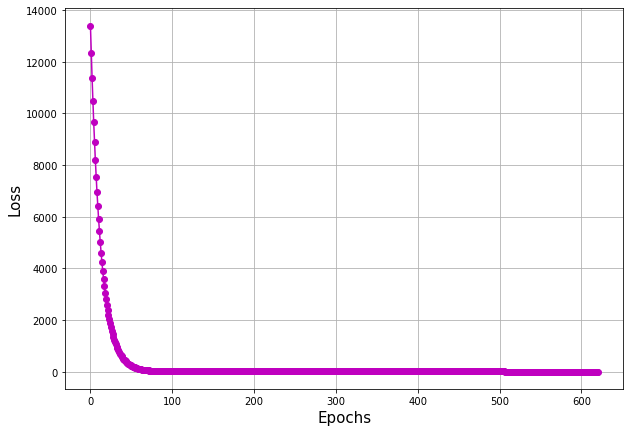

In [24]:
plot(np.arange(0,len(cost)),cost[:len(cost)],'Epochs','Loss','o')


In [11]:
def Dev_to_shff_batches(X,y,batch_num):
    arr = np.hstack((X,y))
    np.random.shuffle(arr)
    Xin = arr[:,:X.shape[1]]
    yin = arr[:,-1].reshape(y.shape)
    Xb = [Xin[batch_num* k: batch_num * (k+1)] for k in range(len(Xin)//batch_num +1)]
    yb = [yin[batch_num* k: batch_num * (k+1)] for k in range(len(yin)//batch_num +1)]
    for i in range(len(Xb)):
        if (len(Xb[i])==0):del(Xb[i])
        if (len(yb[i])==0):del(yb[i])
    return Xb,yb
    

# Mini Batch Gradient Decent

In [17]:
def MB_Gradient_decent(X,y,w,alpha,iteration,thershold,Hypothesis,compute_cost):
    
    w=np.zeros(X[0].shape[1]).reshape(X[0].shape[1],1)
    batch_num=len(X)
    cost_history=[]
    j_epochs_history=[]
    p_history=[]
    gradient__history=[]
    
    
    for i in range(iteration):
        
        for b in range(batch_num):

            p_history.append(w)
            H=Hypothesis(X[b],w)
            err_vec=H - y[b]
            j=(1/(2*batch_num))* np.sum((err_vec) ** 2 )
            cost_history.append((j,err_vec))
            dj_dw=(1/batch_num)*np.dot(X[b].T,err_vec )
            norm= np.linalg.norm(dj_dw)
            gradient__history.append((norm,dj_dw))
            w= w - alpha * dj_dw
        j_epochs_history.append(j)
        print(f"Iteration {i}: \n Cost \n{cost_history[-1]}\n dj_dw: \n{dj_dw}\n ,norm={norm}\n w: {p_history[-1]}")
        if i>0 and ( (norm < thershold)  or  (abs(cost_history[i][0]-cost_history[i-1][0]) <thershold) ):
            break
    return w , j_epochs_history, p_history,gradient__history,i

In [46]:
 Xb,yb=Dev_to_shff_batches(X,y,10)

In [22]:
alpha=0.00001
thershold=0.001
iteration=100
w , cost_history, p_history,gradient__history,i=MB_Gradient_decent(Xb,yb,w,alpha,iteration,thershold,Hypothesis,compute_cost)

Iteration 0: 
 Cost 
(422.7306323105044, array([[-145.38408309]]))
 dj_dw: 
[[  -5.81536332]
 [-505.93660915]
 [-459.41370256]
 [-523.38269912]]
 ,norm=860.8112863830476
 w: [[0.00142411]
 [0.11407457]
 [0.11533868]
 [0.11753611]]
Iteration 1: 
 Cost 
(286.9832744791798, array([[-119.78799491]]))
 dj_dw: 
[[  -4.7915198 ]
 [-416.86222228]
 [-378.53006391]
 [-431.23678167]]
 ,norm=709.2582337689599
 w: [[0.00265178]
 [0.21280894]
 [0.2146463 ]
 [0.21931019]]
Iteration 2: 
 Cost 
(195.08855804533988, array([[-98.7645073]]))
 dj_dw: 
[[  -3.95058029]
 [-343.7004854 ]
 [-312.09584307]
 [-355.55222628]]
 ,norm=584.7793016399567
 w: [[0.0036601 ]
 [0.29389735]
 [0.29620454]
 [0.30291782]]
Iteration 3: 
 Cost 
(132.83436064209715, array([[-81.49673633]]))
 dj_dw: 
[[  -3.25986945]
 [-283.60864242]
 [-257.5296868 ]
 [-293.38825078]]
 ,norm=482.53776441053736
 w: [[0.00448826]
 [0.36049221]
 [0.36318429]
 [0.37160438]]
Iteration 4: 
 Cost 
(90.62277133364657, array([[-67.31373238]]))
 dj_dw: 
[

 [0.69123508]]
Iteration 54: 
 Cost 
(0.08731841346932431, array([[-2.08947856]]))
 dj_dw: 
[[-0.08357914]
 [-7.27138541]
 [-6.60275227]
 [-7.52212283]]
 ,norm=12.371689480507873
 w: [[0.00828824]
 [0.66476379]
 [0.66897157]
 [0.69132255]]
Iteration 55: 
 Cost 
(0.08723041458798864, array([[-2.08842542]]))
 dj_dw: 
[[-0.08353702]
 [-7.26772046]
 [-6.59942432]
 [-7.51833151]]
 ,norm=12.36545385835043
 w: [[0.00828811]
 [0.66472553]
 [0.66892801]
 [0.69140947]]
Iteration 56: 
 Cost 
(0.08715172555837722, array([[-2.08748324]]))
 dj_dw: 
[[-0.08349933]
 [-7.26444168]
 [-6.59644704]
 [-7.51493966]]
 ,norm=12.359875270275516
 w: [[0.00828797]
 [0.66468685]
 [0.66888404]
 [0.69149594]]
Iteration 57: 
 Cost 
(0.08708068086592179, array([[-2.08663223]]))
 dj_dw: 
[[-0.08346529]
 [-7.26148014]
 [-6.59375783]
 [-7.51187601]]
 ,norm=12.354836456880234
 w: [[0.00828783]
 [0.66464782]
 [0.66883972]
 [0.69158202]]
Iteration 58: 
 Cost 
(0.08701591403695348, array([[-2.08585611]]))
 dj_dw: 
[[-0.0834

 [0.69453359]]
Iteration 93: 
 Cost 
(0.08563319914598401, array([[-2.06921723]]))
 dj_dw: 
[[-0.08276869]
 [-7.20087597]
 [-6.53872646]
 [-7.44918204]]
 ,norm=12.251723230591379
 w: [[0.00828197]
 [0.66319571]
 [0.66720137]
 [0.6946174 ]]
Iteration 94: 
 Cost 
(0.08559773114094586, array([[-2.06878867]]))
 dj_dw: 
[[-0.08275155]
 [-7.19938457]
 [-6.53737219]
 [-7.44763921]]
 ,norm=12.249185726502036
 w: [[0.00828181]
 [0.66315527]
 [0.66715587]
 [0.69470119]]
Iteration 95: 
 Cost 
(0.08556228390587611, array([[-2.06836027]]))
 dj_dw: 
[[-0.08273441]
 [-7.19789373]
 [-6.53601844]
 [-7.44609696]]
 ,norm=12.246649183059509
 w: [[0.00828164]
 [0.66311483]
 [0.66711039]
 [0.69478496]]
Iteration 96: 
 Cost 
(0.08552685666990505, array([[-2.06793202]]))
 dj_dw: 
[[-0.08271728]
 [-7.19640342]
 [-6.53466518]
 [-7.44455527]]
 ,norm=12.24411354568158
 w: [[0.00828147]
 [0.6630744 ]
 [0.66706493]
 [0.69486871]]
Iteration 97: 
 Cost 
(0.08549144879858948, array([[-2.06750392]]))
 dj_dw: 
[[-0.0827

In [23]:
print('r2_score = ',r2_score(y,Hypothesis(X,p_history[-1])))

r2_score =  0.9792011912653693


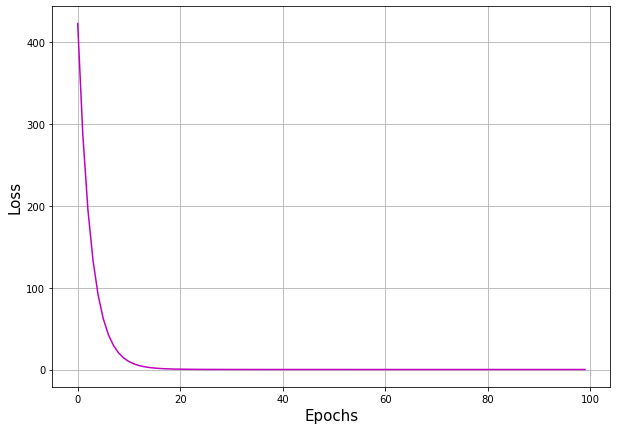

In [24]:

plot(np.arange(0,len(cost_history)),cost_history,'Epochs','Loss','')


# ADAM Mini Batch Gradient Decent

In [25]:
def ADAM_MB_Gradient_decent(X,y,w,alpha,Beta1,Beta2,iteration,thershold,Hypothesis,compute_cost):
    
    w=np.zeros(X[0].shape[1]).reshape(X[0].shape[1],1)
    batch_num=len(X)
    cost_history=[]
    j_epochs_history=[]
    p_history=[]
    gradient__history=[]
    e = 1e-8
    Mt = np.zeros((Xb[0].shape[1],1))
    Vt = np.zeros((Xb[0].shape[1],1))
    
    for i in range(iteration):
        
        for b in range(batch_num):

            p_history.append(w)
            H=Hypothesis(X[b],w)
            err_vec=H - y[b]
            j=(1/(2*batch_num))* np.sum((err_vec) ** 2 )
            cost_history.append((j,err_vec))
            dj_dw=(1/batch_num)*np.dot(X[b].T,err_vec )
            norm= np.linalg.norm(dj_dw)
            Mt = Beta1*Mt + (1-Beta1)*dj_dw
            Vt = Beta2*Vt + (1-Beta2)*((dj_dw)**2)
            Mt_hat = Mt/(1-Beta1**(i+1))
            Vt_hat = Vt/(1-Beta2**(i+1))
            w = w - (alpha*Mt_hat)/(np.sqrt(Vt_hat) + e)
            gradient__history.append((norm,dj_dw))
            
            j_epochs_history.append(j)
        print(f"Iteration {i}: \n Cost \n{cost_history[-1]}\n dj_dw: \n{dj_dw}\n ,norm={norm}\n w: {p_history[-1]}")
        if i>0 and ( (norm < thershold)  or  (abs(cost_history[i][0]-cost_history[i-1][0]) <thershold) ):
            break
    return w , j_epochs_history, p_history,gradient__history,i

In [47]:
alpha = 0.01
iterations = 1000
Beta1 = 0.9
Beta2 = 0.999
threshold = 0.0001
w , cost_history, p_history,gradient__history,i=ADAM_MB_Gradient_decent(Xb,yb,w,alpha,Beta1,Beta2,iteration,thershold,Hypothesis,compute_cost)

Iteration 0: 
 Cost 
(20006.523803459542, array([[-146.63802749],
       [-158.42685899],
       [-143.82521984],
       [-170.93542139],
       [-153.40387844]]))
 dj_dw: 
[[  -257.74313538]
 [-19708.81503583]
 [-20298.98558197]
 [-21070.08138158]]
 ,norm=35277.48526643639
 w: [[0.02341948]
 [0.02342105]
 [0.02339466]
 [0.02342991]]
Iteration 1: 
 Cost 
(17625.81890969067, array([[-137.46844864],
       [-148.8958082 ],
       [-134.97533323],
       [-160.56394508],
       [-143.83412789]]))
 dj_dw: 
[[  -241.91255435]
 [-18498.85635455]
 [-19051.69633874]
 [-19777.34944445]]
 ,norm=33111.58245299746
 w: [[0.06360638]
 [0.06339102]
 [0.06340957]
 [0.06356846]]
Iteration 2: 
 Cost 
(15536.266976147603, array([[-128.89486261],
       [-139.98428013],
       [-126.70064268],
       [-150.86657469],
       [-134.88640165]]))
 dj_dw: 
[[  -227.11092059]
 [-17367.5419665 ]
 [-17885.4776457 ]
 [-18568.64182774]]
 ,norm=31086.45787590347
 w: [[0.10119224]
 [0.10075506]
 [0.10082728]
 [0.1011

 [0.64682967]]
Iteration 51: 
 Cost 
(43.20548528843205, array([[ -3.85143969],
       [-10.00464909],
       [ -6.01261645],
       [ -9.42888988],
       [ -4.38757332]]))
 dj_dw: 
[[ -11.22838948]
 [-867.26420002]
 [-876.14244817]
 [-939.56059953]]
 ,norm=1550.0557986839738
 w: [[0.64933128]
 [0.64532241]
 [0.64634905]
 [0.64910359]]
Iteration 52: 
 Cost 
(37.77038601570864, array([[-3.37216567],
       [-9.5060989 ],
       [-5.54987616],
       [-8.88659931],
       [-3.88743177]]))
 dj_dw: 
[[ -10.40072394]
 [-804.00406128]
 [-810.93179678]
 [-871.97192576]]
 ,norm=1436.8284949698511
 w: [[0.65142621]
 [0.64739915]
 [0.648428  ]
 [0.65122707]]
Iteration 53: 
 Cost 
(33.07756769464503, array([[-2.92565607],
       [-9.04159669],
       [-5.11875468],
       [-8.38136392],
       [-3.42148524]]))
 dj_dw: 
[[  -9.62961887]
 [-745.06693185]
 [-750.1775577 ]
 [-809.00198051]]
 ,norm=1331.3406908201055
 w: [[0.65337736]
 [0.64933293]
 [0.65036368]
 [0.65320758]]
Iteration 54: 
 Cost 
(

 [0.67583485]]
Iteration 93: 
 Cost 
(5.081985568608199, array([[ 1.95368411],
       [-3.94932444],
       [-0.4002671 ],
       [-2.85207302],
       [ 1.66833271]]))
 dj_dw: 
[[  -1.19321591]
 [-100.24538528]
 [ -85.52813703]
 [-120.0199204 ]]
 ,norm=178.24254416122767
 w: [[0.67442774]
 [0.66998794]
 [0.67096759]
 [0.67590306]]
Iteration 94: 
 Cost 
(5.073235181169955, array([[ 1.95935772],
       [-3.94281566],
       [-0.39451739],
       [-2.84534789],
       [ 1.67418174]]))
 dj_dw: 
[[  -1.18304716]
 [ -99.46779176]
 [ -84.72853339]
 [-119.1877016 ]]
 ,norm=176.8611709275606
 w: [[0.6744424 ]
 [0.66999478]
 [0.67097179]
 [0.67596738]]
Iteration 95: 
 Cost 
(5.065637661474124, array([[ 1.96419961],
       [-3.93716736],
       [-0.3895686 ],
       [-2.83956148],
       [ 1.67916227]]))
 dj_dw: 
[[  -1.17431185]
 [ -98.79975586]
 [ -84.04188056]
 [-118.47252585]]
 ,norm=175.67455090972675
 w: [[0.67445335]
 [0.66999787]
 [0.67097223]
 [0.67602831]]
Iteration 96: 
 Cost 
(5.0590

In [48]:
print('r2_score = ',r2_score(y,Hypothesis(X,p_history[-1])))

r2_score =  0.9783982108684969


In [50]:
len(cost_history)

300

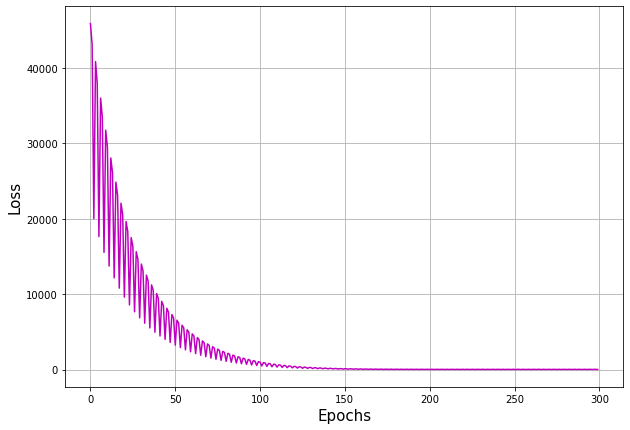

In [49]:
# Ws_all=[p_history[i][1] for i in range(len(p_history)) ]
# cost=[cost_history[i][0] for i in range(len(cost_history)) ]
plot(np.arange(0,len(cost_history)),cost_history,'Epochs','Loss','')